In [10]:
from solution import Solution
from basis import Basis
import itertools
import numpy as np

# SET ACCURATE PHI

a = 1
b = 1

eps = 0.2

power = 4
params = {
    'n_dims': 2,
    'dim_sizes': np.array([2, 10]),
    'area_lims': np.array([[0,0.1], [0,1]]),
    'power': power,
    'basis': Basis(power),
    'n_funcs': 2,
}
sol = Solution(**params)
w = (sol.steps[0]/2)

def f_collocation_points(N):
    points = np.zeros(N+1)
    h = 2/(N+1)
    points[0] = -1 + h/2
    for i in range(1, N+1):
        points[i] = points[i-1] + h
    return np.array(points).reshape(N+1,1)

# c_p_1d = f_collocation_points(int(np.ceil(power/2))).reshape(int(np.ceil(power/2))+1)
# power = int(3/2*power)
c_p_1d = f_collocation_points(power).reshape(power+1)

colloc_points = np.array(list(itertools.product(c_p_1d, c_p_1d)))


connect_points = np.array([[-1, 0.5], [1, 0.5],
                            [0.5, -1], [0.5, 1],
                            [-1, -0.5], [1, -0.5],
                            [-0.5, -1], [-0.5, 1],])
                            
border_points = connect_points
# border_points = np.array([[-1, 0.5], [1, 0.5],
#                             [0.5, -1], [0.5, 1],
#                             [-1, -0.5], [1, -0.5],
#                             [-0.5, -1], [-0.5, 1],])

colloc_left_operators = [lambda u_loc, u_bas, x, x_loc:  (-u_bas([1,0],1)-eps*u_bas([0,2],1)

                                                                                            +(u_loc([0,0],0)*u_bas([0,1],1)**2)/2
                                                                                            
                                                                                            # +(u_bas([0,0],0)*u_loc([0,1],1)**2)/4

                                                                                            -(u_bas([0,0],0)*u_loc([0,1],1)**2+
                                                                                            2*u_bas([0,0],0)*u_bas([0,1],1)*u_loc([0,1],1))/2/3
                                                                                            ) * w**2 ,
                         lambda u_loc, u_bas, x, x_loc:  (u_bas([1,0],0)-eps*u_bas([0,2],0)
                                                                                            # '''
                                                                                            # +(2*u_bas([0,1],1)*u_loc([0,1],0)*u_loc([0,0],0)
                                                                                            # +u_bas([0,2],1)*u_loc([0,1],0)**2)/2
                                                                                            # '''

                                                                                            # -(2*u_loc([0,1],1)*u_bas([0,1],0)*u_loc([0,0],0)
                                                                                            # +u_bas([0,2],1)*u_loc([0,1],0)**2)/2

                                                                                                +(2*(u_bas([0,1],1)*u_loc([0,1],0)*u_loc([0,0],0)+
                                                                                                +u_loc([0,1],1)*u_bas([0,1],0)*u_loc([0,0],0)+
                                                                                                +u_loc([0,1],1)*u_loc([0,1],0)*u_bas([0,0],0))+

                                                                                            +u_bas([0,2],1)*u_loc([0,1],0)**2+
                                                                                          +2*u_loc([0,2],1)*u_bas([0,1],0)*u_loc([0,1],0))/2/3 
                                                                                          ) * w**2]
colloc_right_operators = [lambda u_loc, u_nei, x, x_loc: 0,
                          lambda u_loc, u_nei, x, x_loc: 0]
colloc_ops = [colloc_left_operators, colloc_right_operators]

def terminal_state(rho,x):
    point = x
    t, x = x
    if t >= 0.0999:
        p = 6*x*(1-x)
        return rho.eval(point, [0, 0], func=0, cells_closed_right=True) - p
    else:
        return 0

def p(x):
    return 6*x*(1-x)

def initial_state(point):
    t, x = point
    if t == 0:
        return 1
    else:
        return 10*(0.1 - t)

def reversed_intitial(point):
    t, x = point
    # if t == 0.1:
    #     return 1
    # else:
    return 10*t

border_weight = 1
small = 1e-5
border_left_operators = [lambda _, u_bas, x, x_loc: int(x[0]>sol.area_lims[0,0]+small)*u_bas([0,0],1) * border_weight,
                         lambda _, u_bas, x, x_loc: int(x[0]<sol.area_lims[0,1]-small)*u_bas([0,0],0) * border_weight, 
                            ]

border_right_operators = [lambda u, _, x, x_loc: int(x[0]>sol.area_lims[0,1]-small) * (u([0,0],0)-p(x[0])) * border_weight,
                          lambda u, _, x, x_loc: int(x[0]<sol.area_lims[0,1]-small)*initial_state(x) * border_weight,
                            ]
border_ops = [border_left_operators, border_right_operators]



def f_collocation_points(N):
    points = np.zeros(N+1)
    h = 2/(N+1)
    points[0] = -1 + h/2
    for i in range(1, N+1):
        points[i] = points[i-1] + h
    return np.array(points).reshape(N+1,1)

# c_p_1d = f_collocation_points(int(np.ceil(power/2))).reshape(int(np.ceil(power/2))+1)

c_p_1d = f_collocation_points(power).reshape(power+1)

colloc_points = np.array(list(itertools.product(c_p_1d, c_p_1d)))
connect_points = np.array([[-1, 0.5], [1, 0.5],
                            [0.5, -1], [0.5, 1],
                            [-1, -0.5], [1, -0.5],
                            [-0.5, -1], [-0.5, 1],
                            ])
border_points = np.array([[1, 0.5], [1, -0.5],
                            [0.5, -1], [0.5, 1],
                            [-0.5, -1], [-0.5, 1],
                            [-1, 0.5], [-1, -0.5],
                            ])
points=[colloc_points, connect_points ,border_points]

iteration_dict = {'points':points,
        'colloc_ops':colloc_ops,
        'border_ops':border_ops,
#        'connect_ops':connect_ops
}

sol.cells_coefs *= 0.0


In [11]:
sol.solve(**iteration_dict,verbose=True, threshold=1e-2)

0.6073793761229793
0.46936333497677285
0.5266909468757439
0.4192577001729011
0.3395083919466591
0.598137128108019
1.0404535506919554
1.5715030956333182
1.80482416548415
1.2886383842295472
1.1761297199331586
1.128228109704791
1.447331840972633
1.9443852541282325
1.8241794962973286
1.1246125982017654
0.9620445292901865
0.7751588627519652
1.1822640323933613
1.4035322190511306
1.5370630163206398
1.4880623878561083
1.2717280419413133
1.0328552460354903
1.1380380245362505
1.3343618991148865
1.5222799161878506
1.317004652594484
0.9827730261126272
1.0943963515392108
1.5928963519761472
1.9094163398461346
1.6311807069379922
1.4153315346298587
0.9701352994464221
0.9082768474830444
0.9879403990430013
1.185654299041423
0.9414364567825795
1.112977204193658
1.5027332183181268
1.6605884097183188
1.5739749627863584
0.9977134236113363
1.0435326334600825
1.2520432515629132
1.212752525096925
0.852132226639706
0.7063118553697578
0.7905101085353774
0.8374432293511611
0.9621699376725508
1.089207864085158
1.1

KeyboardInterrupt: 

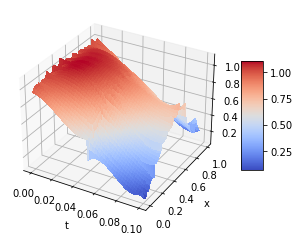

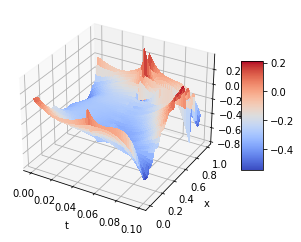

In [12]:
sol.plot2d(func_num=0)
sol.plot2d(func_num=1)

In [2]:
sol.iterate_cells(**iteration_dict)

In [3]:
sol.solve(**iteration_dict,verbose=True)

0.290766571282047
0.09322248211093029
0.015279749893365863
0.0016546381951943467
0.0001583307734960293
1.539516307041966e-05
1.6756244277556231e-06
2.949811296892868e-07
4.805604558733023e-08
1.0645106435225316e-08
1.4301809458938664e-09
1.1696010826511838e-10
1.9476947832330893e-11
Iterations to converge:  12


In [323]:
from solution import Solution
from basis import Basis
import itertools
import numpy as np

# SET ACCURATE PHI

a = 1
b = 1

eps = 0.2

power = 5
params = {
    'n_dims': 2,
    'dim_sizes': np.array([4, 6]),
    'area_lims': np.array([[0,0.1], [0,1]]),
    'power': power,
    'basis': Basis(power),
    'n_funcs': 1,
}

# sol = Solution(**params)
rho = Solution(**params)
phi = Solution(**params)
phi_cumulative = Solution(**params)
w = (rho.steps[0]/2)

def f_collocation_points(N):
    points = np.zeros(N+1)
    h = 2/(N+1)
    points[0] = -1 + h/2
    for i in range(1, N+1):
        points[i] = points[i-1] + h
    return np.array(points).reshape(N+1,1)

c_p_1d = f_collocation_points(power).reshape(power+1)

colloc_points = np.array(list(itertools.product(c_p_1d, c_p_1d)))


connect_points = np.array([[-1, 0.5], [1, 0.5],
                            [0.5, -1], [0.5, 1],
                            [-1, -0.5], [1, -0.5],
                            [-0.5, -1], [-0.5, 1],])
                            
border_points = connect_points

colloc_left_operators_phi = [lambda u_loc, u_bas, x, x_loc:  (-u_bas([1,0])-eps*u_bas([0,2])

                                                                                            +(rho.eval(x,[0,0])*u_bas([0,1],1)**2)/2
                                                                                            # +(u_bas([0,0],0)*u_loc([0,1],1)**2)/4

                                                                                            # -(u_bas([0,0],0)*u_loc([0,1],1)**2+
                                                                                            # 2*u_bas([0,0],0)*u_bas([0,1],1)*u_loc([0,1],1))/2/3
                                                                                            ) * w**2]
colloc_left_operators = [lambda u_loc, u_bas, x, x_loc:  (u_bas([1,0],0)-eps*u_bas([0,2],0)
                                                                                            # '''
                                                                                            # +(2*u_bas([0,1],1)*u_loc([0,1],0)*u_loc([0,0],0)
                                                                                            # +u_bas([0,2],1)*u_loc([0,1],0)**2)/2
                                                                                            # '''
                                                                                            -(2*phi.eval(x,[0,1])*u_bas([0,1],0)*u_loc([0,0],0)
                                                                                            +phi.eval(x,[0,2])*u_loc([0,1],0)**2)/2

                                                                                        #         +(2*(u_bas([0,1],1)*u_loc([0,1],0)*u_loc([0,0],0)+
                                                                                        #         +u_loc([0,1],1)*u_bas([0,1],0)*u_loc([0,0],0)+
                                                                                        #         +u_loc([0,1],1)*u_loc([0,1],0)*u_bas([0,0],0))+

                                                                                        #     +u_bas([0,2],1)*u_loc([0,1],0)**2+
                                                                                        #   +2*u_loc([0,2],1)*u_bas([0,1],0)*u_loc([0,1],0))/2/3 
                                                                                          ) * w**2]
colloc_right_operators_phi = [lambda u_loc, u_nei, x, x_loc: 0]
colloc_right_operators = [lambda u_loc, u_nei, x, x_loc: 0]
colloc_ops = [colloc_left_operators, colloc_right_operators]
colloc_ops_phi = [colloc_left_operators_phi, colloc_right_operators_phi]


def terminal_state(rho,x):
    point = x
    t, x = x
    if t >= 0.0999:
        p = 6*x*(1-x)
        return rho.eval(point, [0, 0], func=0, cells_closed_right=True) - p
    else:
        return 0

def p(x):
    # return 6*x*(1-x)
    return 12*x*(1-x)*(1-x)

def initial_state(point):
    t, x = point
    if t == 0:
        return 1
    else:
        return 10*(0.1 - t)

def initial_state(point):
    t, x = point
    return 12*x*x*(1-x)

# def reversed_intitial(point):
#     t, x = point
#     # if t == 0.1:
#     #     return 1
#     # else:
#     return 10*t

border_weight = 1
small = 1e-5
border_left_operators_phi = [lambda _, u_bas, x, x_loc: int(x[0]>sol.area_lims[0,1]-small)*u_bas([0,0]) * border_weight]
border_left_operators = [lambda _, u_bas, x, x_loc: int(x[0]<sol.area_lims[0,1]-small)*u_bas([0,0],0) * border_weight, 
                            ]

border_right_operators_phi = [lambda u, _, x, x_loc: int(x[0]>sol.area_lims[0,1]-small) * (rho.eval(x,[0,0],cells_closed_right=True)-p(x[1])) * border_weight]
border_right_operators = [lambda u, _, x, x_loc: int(x[0]<sol.area_lims[0,1]-small)*initial_state(x) * border_weight,
                            ]
border_ops = [border_left_operators, border_right_operators]
border_ops_phi = [border_left_operators_phi, border_right_operators_phi]



def f_collocation_points(N):
    points = np.zeros(N+1)
    h = 2/(N+1)
    points[0] = -1 + h/2
    for i in range(1, N+1):
        points[i] = points[i-1] + h
    return np.array(points).reshape(N+1,1)

# c_p_1d = f_collocation_points(int(np.ceil(power/2))).reshape(int(np.ceil(power/2))+1)

c_p_1d = f_collocation_points(power).reshape(power+1)

colloc_points = np.array(list(itertools.product(c_p_1d, c_p_1d)))

connect_points = np.array([
                            [0, -1], [0, 1],
                            [-1, 0.], [1, 0.],
                            [-1, 0.5], [1, 0.5],
                            [0.5, -1], [0.5, 1],
                            [-1, -0.5], [1, -0.5],
                            [-0.5, -1], [-0.5, 1],
                            ])

border_points = connect_points
# border_points = np.array([[1, 0.5], [1, -0.5],
#                             [0.5, -1], [0.5, 1],
#                             [-0.5, -1], [-0.5, 1],
#                             [-1, 0.5], [-1, -0.5],
#                             ])
points=[colloc_points, connect_points ,border_points]

iteration_dict = {'points':points,
        'colloc_ops':colloc_ops,
        'border_ops':border_ops,
#        'connect_ops':connect_ops
}

iteration_dict_phi = {'points':points,
        'colloc_ops':colloc_ops_phi,
        'border_ops':border_ops_phi,
#        'connect_ops':connect_ops
}

phi.cells_coefs *= 0.0
rho.cells_coefs *= 0.0
phi_cumulative.cells_coefs *= 0.0


In [324]:
# thresh = 1e-5

# b = 0.5

# border_right_operators = [lambda u, _, x, x_loc: int(x[0]<phi.area_lims[0,1]-small)*initial_state(x) * border_weight]
# border_left_operators = [lambda _, u_bas, x, x_loc: int(x[0]<phi.area_lims[0,1]-small)*u_bas([0,0],0) * border_weight]
# border_ops = [border_left_operators, border_right_operators]

# colloc_weight = w**2
# colloc_right_operators = [lambda u_loc, u_nei, x, x_loc: 0 *  colloc_weight]
# colloc_left_operators = [lambda u_loc, u_bas, x, x_loc:  (u_bas([1,0],0)-eps*u_bas([0,2],0)
#                                                                                             -(phi.eval(x,[0,1])*u_bas([0,1],0)
#                                                                                             +phi.eval(x,[0,2])*u_bas([0,0],0) - b*u_bas([0,1],0))/2
#                                                                                           ) * colloc_weight]
# colloc_ops = [colloc_left_operators, colloc_right_operators]
# iteration_dict = {'points':points,
#         'colloc_ops':colloc_ops,
#         'border_ops':border_ops,
#         'threshold':thresh
# }
# rho.solve(**iteration_dict, verbose=True)


# border_left_operators_phi = [lambda _, u_bas, x, x_loc: int(x[0]>phi.area_lims[0,0]+small)*u_bas([0,0]) * border_weight]
# border_right_operators_phi = [lambda u, _, x, x_loc: int(x[0]>phi.area_lims[0,1]-small) * (rho.eval(x-[0,1e-5],[0,0],cells_closed_right=True)-p(x[1])) * border_weight]
# border_ops_phi = [border_left_operators_phi, border_right_operators_phi]
# colloc_left_operators_phi = [lambda u_loc, u_bas, x, x_loc:  (-u_bas([1,0])-eps*u_bas([0,2])
#                                                                                             -((rho.eval(x,[0,0])-b)*u_bas([0,1]))/2
#                                                                                             )* colloc_weight]

# colloc_right_operators_phi = [lambda u_loc, u_nei, x, x_loc: (-((phi.eval(x,[0,1])**2-b**2)/4)) * colloc_weight]
# colloc_ops_phi = [colloc_left_operators_phi, colloc_right_operators_phi]
# iteration_dict_phi = {'points':points,
#         'colloc_ops':colloc_ops_phi,
#         'border_ops':border_ops_phi,
#         'threshold':thresh
# }
# phi.solve(**iteration_dict_phi, verbose=True)

In [349]:
thresh = 1e-5

b = 0.5
a = 1

border_right_operators = [lambda u, _, x, x_loc: int(x[0]<phi.area_lims[0,1]-small)*initial_state(x) * border_weight]
border_left_operators = [lambda _, u_bas, x, x_loc: int(x[0]<phi.area_lims[0,1]-small)*u_bas([0,0],0) * border_weight]
border_ops = [border_left_operators, border_right_operators]

colloc_weight = w**2
colloc_right_operators = [lambda u_loc, u_nei, x, x_loc: 0 *  colloc_weight]
colloc_left_operators = [lambda u_loc, u_bas, x, x_loc:  (u_bas([1,0],0)-eps*u_bas([0,2],0)
                                                                                            -(phi_cumulative.eval(x,[0,1])*u_bas([0,1],0)
                                                                                            +phi_cumulative.eval(x,[0,2])*u_bas([0,0],0) - b*u_bas([0,1],0))/2/a
                                                                                          ) * colloc_weight]
colloc_ops = [colloc_left_operators, colloc_right_operators]
iteration_dict = {'points':points,
        'colloc_ops':colloc_ops,
        'border_ops':border_ops,
        'threshold':thresh
}
rho.solve(**iteration_dict, verbose=True)

border_weight = 2

border_left_operators_phi = [lambda _, u_bas, x, x_loc: int(x[0]>phi.area_lims[0,0]+small)*u_bas([0,0]) * border_weight]
border_right_operators_phi = [lambda u, _, x, x_loc: int(x[0]>phi.area_lims[0,1]-small) * (rho.eval(x-[0,1e-5],[0,0],cells_closed_right=True)-p(x[1])) * border_weight]
border_ops_phi = [border_left_operators_phi, border_right_operators_phi]
colloc_left_operators_phi = [lambda u_loc, u_bas, x, x_loc:  (-u_bas([1,0])-eps*u_bas([0,2])
                                                                                            -((rho.eval(x,[0,0])-b)*u_bas([0,1]))/2/a
                                                                                            )* colloc_weight]

colloc_right_operators_phi = [lambda u_loc, u_nei, x, x_loc: (-((phi_cumulative.eval(x,[0,1])**2-b**2)/4)) * colloc_weight]
colloc_ops_phi = [colloc_left_operators_phi, colloc_right_operators_phi]
iteration_dict_phi = {'points':points,
        'colloc_ops':colloc_ops_phi,
        'border_ops':border_ops_phi,
        'threshold':thresh
}
phi.solve(**iteration_dict_phi, verbose=True)

phi_cumulative.cells_coefs += phi.cells_coefs * 0.2

0.02716533459496029
0.019345191343036472
0.00997205205960805
0.006605573326464498
0.003478912736861739
0.001530771567784396
0.0009405505911832812
0.0004857705239843524
0.0002959453442362703
0.00015964527743855816
7.939642270587965e-05
4.205607879997908e-05
2.453764224935595e-05
1.5210711350960651e-05
8.65603973686669e-06
Iterations to converge:  14
0.03464602882478453
0.026111590116444903
0.01211445169491629
0.008871711458172844
0.008489011655901862
0.006265924190250509
0.0061167164470346674
0.00473400142366287
0.0029570277578370996
0.0015588741559886543
0.0008569997644922757
0.00047638206060216046
0.00019823769779394457
0.00011479378784639942
4.7672335211283116e-05
3.350072720592623e-05
2.0609694892870234e-05
1.4197117675616294e-05
7.060319122946523e-06
Iterations to converge:  18


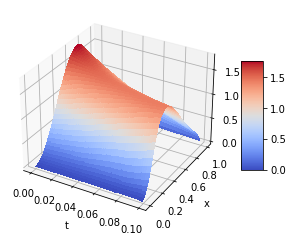

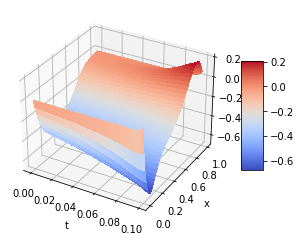

In [352]:
rho.plot2d(func_num=0)
phi.plot2d(func_num=0)

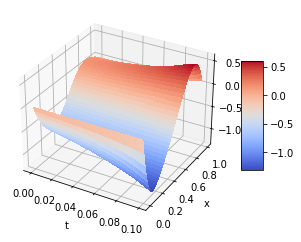

In [353]:
phi_cumulative.plot2d(func_num=0)

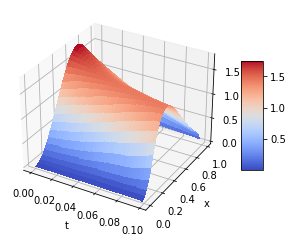

In [354]:
import matplotlib.pyplot as plt
n = 60
func = np.zeros((n,n))
x_lims = rho.area_lims[0]
y_lims = rho.area_lims[1]
ax1 = np.linspace(x_lims[0], x_lims[1], n, endpoint=False)
ax2 = np.linspace(y_lims[0], y_lims[1], n, endpoint=False)
X, Y = np.meshgrid(ax1, ax2)

for i in range(n):
    for j in range(n): 
        func[j, i] = rho.eval([ax1[i], ax2[j]], [0,0])

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, func, cmap=cm.coolwarm,
                linewidth=0, antialiased=False)

# ax.set_xticks(X)
# ax.set_xticks(Y)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('t')
ax.set_ylabel('x')
plt.show()

In [355]:
intrested = [p(x) for x in np.linspace(0,1,n)]

([<matplotlib.axis.XTick at 0x289004977f0>,
 [Text(0, 0, '0'),
  Text(15, 0, '0.25'),
  Text(30, 0, '0.5'),
  Text(45, 0, '0.75'),
  Text(60, 0, '1')])

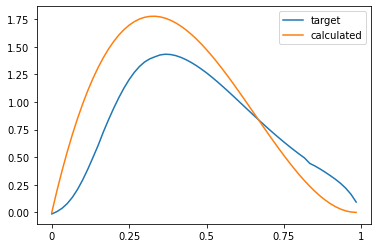

In [357]:
plt.plot(func[:,-1])
plt.plot(intrested)
plt.legend(['target', 'calculated'])
plt.xticks([0, 15, 30, 45, 60], [0, 0.25, 0.5, 0.75, 1])

In [339]:
np.sum(func[:,-1])/n

0.7945336441725993

In [3]:
pi = 3.141592659
def rho_exact(point):
    t,x = point
    T = 0.1
    # return 1*(1 - t/(T*1.1)) + 6*x*(1-x) * t/(T*1.1)
    return 1*(1 - (t/T)**2) + pi/2*np.sin(pi*x) * (t/T)**2

border_left_operators_phi = [lambda _, u_bas, x, x_loc: int(x[0]>phi.area_lims[0,0]+small)*u_bas([0,0]) * border_weight]
border_right_operators_phi = [lambda u, _, x, x_loc: int(x[0]>phi.area_lims[0,1]-small) * (rho_exact(x)-p(x[0])) * border_weight]
border_ops_phi = [border_left_operators_phi, border_right_operators_phi]

colloc_left_operators_phi = [lambda u_loc, u_bas, x, x_loc:  (-u_bas([1,0])-eps*u_bas([0,2])
                                                                                            -(rho_exact(x)*u_bas([0,1]))/2
                                                                                            ) * w**2]
colloc_right_operators_phi = [lambda u_loc, u_nei, x, x_loc: 0]
colloc_ops_phi = [colloc_left_operators_phi, colloc_right_operators_phi]

thresh = 1e-5
iteration_dict_phi = {'points':points,
        'colloc_ops':colloc_ops_phi,
        'border_ops':border_ops_phi,
        'threshold':thresh
}
phi.solve(**iteration_dict_phi, verbose=True)

0.6095145352346922
0.3879850030615094
0.32449587503735144
0.27196906620834316
0.2546573922107558
0.22389947232784518
0.11175330311570675
0.050604943709881986
0.031054417287438206
0.02143267059276489
0.009478028474386578
0.003918002804492518
0.003419330680369908
0.0012944873299679822
0.0009347111034853416
0.0004470084853735023
0.0002740963859047467
0.0001310384236514041
6.159026622602412e-05
3.122588936932489e-05
1.44963719482449e-05
9.528647534093858e-06
Iterations to converge:  21


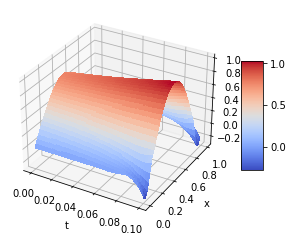

In [4]:
phi.plot2d()

In [23]:
rho_exact([0.1, 1])

-8.49833302512715e-09

In [24]:
rho_exact([0.1, 0])

0.0

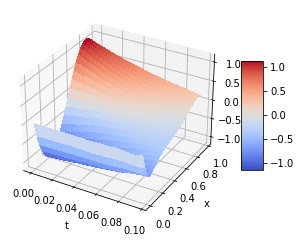

In [98]:
import matplotlib.pyplot as plt
from matplotlib import cm
n=30
func = np.zeros((n,n))
x_lims = phi.area_lims[0]
y_lims = phi.area_lims[1]
ax1 = np.linspace(x_lims[0], x_lims[1], n, endpoint=False)
ax2 = np.linspace(y_lims[0], y_lims[1], n, endpoint=False)
X, Y = np.meshgrid(ax1, ax2)

for i in range(n):
    for j in range(n): 
        func[j, i] = rho.eval([ax1[i], ax2[j]],[0,0]) - p(ax2[j])

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, func, cmap=cm.coolwarm,
                linewidth=0, antialiased=False)

# ax.set_xticks(X)
# ax.set_xticks(Y)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('t')
ax.set_ylabel('x')
plt.show()

In [358]:
# def rho_t(point):
#     t,x = point
#     T = 0.1
#     # return 1*(1 - t/(T*1.1)) + 6*x*(1-x) * t/(T*1.1)
#     return 1*(1 - 2*(t/T**2)) + pi/2*np.sin(pi*x) * 2*(t/T**2)

# def rho_x(point):
#     t,x = point
#     T = 0.1
#     # return 1*(1 - t/(T*1.1)) + 6*x*(1-x) * t/(T*1.1)
#     return pi**2/2*np.cos(pi*x) * (t/T)**2

# def rho_xx(point):
#     t,x = point
#     T = 0.1
#     # return 1*(1 - t/(T*1.1)) + 6*x*(1-x) * t/(T*1.1)
#     return -pi**3/2*np.sin(pi*x) * (t/T)**2

def f(point):
    t,x = point
    T = 0.1
    bracket = (rho_t(point) - eps*rho_xx(point))/(-phi.eval(point,[1,0]) - phi.eval(point,[0,2]))
    return np.log10(abs(bracket - phi.eval(point,[0,1])/2 - np.sqrt((bracket + phi.eval(point,[0,1])/2)**2 + rho_x(point)/2)))

def f(point):
    t,x = point
    T = 0.1
    bracket = (rho.eval(point,[1,0]) - eps*rho.eval(point,[0,2]))/(-phi.eval(point,[1,0]) - phi.eval(point,[0,2]))
    return np.log10(abs(bracket - phi.eval(point,[0,1])/2 - np.sqrt((bracket + phi.eval(point,[0,1])/2)**2 + rho.eval(point,[0,1])/2)))

C:\Users\1\AppData\Local\Temp\ipykernel_3844\3010183850.py:29: RuntimeWarning: invalid value encountered in sqrt
  return np.log10(abs(bracket - phi.eval(point,[0,1])/2 - np.sqrt((bracket + phi.eval(point,[0,1])/2)**2 + rho.eval(point,[0,1])/2)))


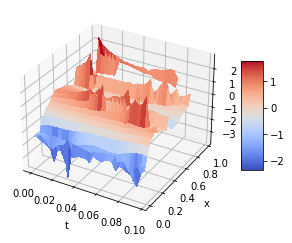

In [359]:
import matplotlib.pyplot as plt
from matplotlib import cm
n=30
func = np.zeros((n,n))
x_lims = phi.area_lims[0]
y_lims = phi.area_lims[1]
ax1 = np.linspace(x_lims[0], x_lims[1], n, endpoint=False)
ax2 = np.linspace(y_lims[0], y_lims[1], n, endpoint=False)
X, Y = np.meshgrid(ax1, ax2)

for i in range(n):
    for j in range(n): 
        func[j, i] = f([ax1[i], ax2[j]])

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, func, cmap=cm.coolwarm,
                linewidth=0, antialiased=False)

# ax.set_xticks(X)
# ax.set_xticks(Y)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('t')
ax.set_ylabel('x')
# ax.set_zscale('log') 
plt.show()

In [197]:
func[np.isnan(func)] = 0

In [198]:
np.mean(func)

0.041583613911817155

In [199]:
np.max(func)

2.5867709109913735

In [200]:
np.min(func)

-3.319747788951779

In [363]:
point = [0.02, 0.3]
n = 20
ax1 = np.linspace(x_lims[0], x_lims[1], n, endpoint=False)
ax2 = np.linspace(y_lims[0], y_lims[1], n, endpoint=False)

A_b = np.array([[rho.eval(point,[1,0]) - eps*rho.eval(point,[0,2]), rho.eval(point,[0,1])/2],
                    [-phi.eval(point,[1,0]) - eps*phi.eval(point,[0,2]), phi.eval(point,[0,1])/2]])
b_b = np.array([(rho.eval(point,[0,0])*phi.eval(point,[0,2]) + rho.eval(point,[0,1])*phi.eval(point,[0,1]))/2,
                (phi.eval(point,[0,1])**2)/2])

for t in ax1:
    for x in ax2:
        point = [t,x]

        A = np.array([[rho.eval(point,[1,0]) - eps*rho.eval(point,[0,2]), rho.eval(point,[0,1])/2],
                    [-phi.eval(point,[1,0]) - eps*phi.eval(point,[0,2]), phi.eval(point,[0,1])/2]])

        b = np.array([(rho.eval(point,[0,0])*phi.eval(point,[0,2]) + rho.eval(point,[0,1])*phi.eval(point,[0,1]))/2,
                        (phi.eval(point,[0,1])**2)/2])

        A_b = np.concatenate((A_b,A))
        b_b = np.concatenate((b_b,b))

In [364]:
from qr_solver import QR_solve, QR_housholder

QR_solve(A_b,b_b)

array([-0.3027867 , -0.87342671])

In [ ]:
QR_housholder(A_b,b_b)

In [419]:
thresh = 1e-5

chi = Solution(**params)
eta = Solution(**params)
rho_inverse = Solution(**params)
phi_inverse = Solution(**params)
phi_cumulative_inv = Solution(**params)
chi.cells_coefs *= 0.0
eta.cells_coefs *= 0.0
rho_inverse.cells_coefs *= 0.0
phi_inverse.cells_coefs *= 0.0
phi_cumulative_inv.cells_coefs *= 0.0


In [393]:


b = 0.5
a = 1

border_right_operators = [lambda u, _, x, x_loc: 0 * border_weight]
border_left_operators = [lambda _, u_bas, x, x_loc: int(x[0]>phi.area_lims[0,1]+small)*u_bas([0,0],0) * border_weight]
border_ops = [border_left_operators, border_right_operators]

colloc_weight = w**2
colloc_right_operators = [lambda u_loc, u_nei, x, x_loc: (-eta.eval(point,[0,0])*phi_cumulative_inv.eval(x,[0,1]) + 2*(rho_inverse.eval(x,[0,0]) - rho.eval(x,[0,0]))
                                                                                                                ) *  colloc_weight]
colloc_left_operators = [lambda u_loc, u_bas, x, x_loc:  2*a*(-u_bas([1,0],0)-eps*u_bas([0,2],0)
                                                                                            +b*u_bas([0,1])
                                                                                          ) * colloc_weight]
colloc_ops = [colloc_left_operators, colloc_right_operators]
iteration_dict = {'points':points,
        'colloc_ops':colloc_ops,
        'border_ops':border_ops,
        'threshold':thresh
}
chi.solve(**iteration_dict, verbose=True)

0.02862245912408966
0.029979321413048828
0.009895321679880704
0.0033428482554689193
0.005546338065787461
0.003051616746077184
0.0007361679776606801
0.0005005239744005621
0.0006609329968030512
0.0005466914221071656
0.0003569678851213312
0.000368315771019092
0.00034180188139523596
0.0002942986750070842
0.0002423727994
0.0002294748653550863
0.00022017734390282657
0.0002164316212368133
0.0002081152041450724
0.00019934100944789344
0.00019265336639001478
0.00018901755778447625
0.0001882164295637593
0.00018938577213895545
0.00019149535640858306
0.00019367606191607323
0.00019537356444119906
0.000196360798944052
0.00019666362820203523
0.00019645356347373737
0.0001959476110324973
0.00019533722991379662
0.00019475223612091565
0.00019425447068015158
0.0001938507844215019
0.00019351433771198955
0.00019320559614132825
0.0001928879503647488
0.00019253625819664688
0.00019213904197499425
0.00019169635027572454
0.00019121556068599135
0.0001907069975405789
0.00019018053310569357
0.00018964362808359422
0.

KeyboardInterrupt: 

In [396]:
border_left_operators_eta = [lambda _, u_bas, x, x_loc: int(x[0]<phi.area_lims[0,0]-small)*u_bas([0,0]) * border_weight]
border_right_operators_eta = [lambda u, _, x, x_loc: 0]#int(x[0]>phi.area_lims[0,1]-small) * (rho.eval(x-[0,1e-5],[0,0],cells_closed_right=True)-p(x[1])) * border_weight]
border_ops_eta = [border_left_operators_eta, border_right_operators_eta]
colloc_left_operators_eta = [lambda u_loc, u_bas, x, x_loc:  2*a*(u_bas([1,0])-eps*u_bas([0,2])
                                                                                            +b*u_bas([0,1])
                                                                                            )* colloc_weight]

colloc_right_operators_eta = [lambda u_loc, u_nei, x, x_loc: (chi.eval(x,[0,2])*rho_inverse.eval(x,[0,0])**2) * colloc_weight]
colloc_ops_eta = [colloc_left_operators_eta, colloc_right_operators_eta]
iteration_dict_eta = {'points':points,
        'colloc_ops':colloc_ops_eta,
        'border_ops':border_ops_eta,
        'threshold':thresh
}
eta.solve(**iteration_dict_eta, verbose=True)

0.15956868721812634
0.1700405852101051
0.08073626536754165
0.04959318296032969
0.02166862956552846
0.013867066621890023
0.01789371103770168
0.019575962670898207
0.014339541305670639
0.006798849005378275
0.0059312144043505675
0.005377298719119093
0.005988776966645428
0.005726159393232561
0.004244081913740811
0.002870227846617425
0.0027350439370629614
0.002411646171783851
0.002043816570289788
0.0017315409727337826
0.0016503537237366611
0.001653452423232095
0.0016130714966799131
0.0015592142887232568
0.001512514391619417
0.0015129180192253004
0.0015322043015393513
0.0015311958805660601
0.001514342035468269
0.0014991616714385286
0.0015094822662972962
0.0015151085588582039
0.0015157660116712351
0.001512405337233902
0.0015065019367823673
0.0014995001857940199
0.0014924839163333314
0.0014860655622026472
0.001480434804902439
0.001475491269403089
0.0014709948756873661
0.001466689495546486
0.0014623799049807186
0.0014579616557647904
0.0014534153815946686
0.0014487813198684266
0.00144412844778414

KeyboardInterrupt: 

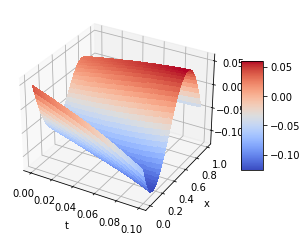

In [397]:
chi.plot2d()

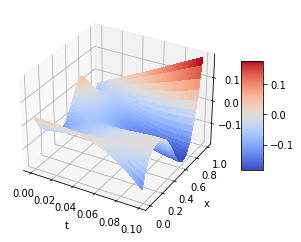

In [398]:
eta.plot2d()

In [409]:
#a, b gradient
n=40
ax1 = np.linspace(x_lims[0], x_lims[1], n, endpoint=False)
ax2 = np.linspace(y_lims[0], y_lims[1], n, endpoint=False)
func = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        x = [ax1[i], ax2[j]]
        func[i, j] = chi.eval(x,[0,0])*(rho_inverse.eval(x,[1,0]) - eps*rho_inverse.eval(x,[0,1]))+2*eta.eval(x,[0,0])*(-phi_inverse.eval(x,[1,0]) - eps*phi_inverse.eval(x,[0,2]))


In [410]:
Ja = np.sum(func)/n/n/10
Ja

-0.000505472314056493

In [407]:
n=40
ax1 = np.linspace(x_lims[0], x_lims[1], n, endpoint=False)
ax2 = np.linspace(y_lims[0], y_lims[1], n, endpoint=False)
func = np.zeros((n,n))
for i in range(n):
    for j in range(n): 
        x = [ax1[i], ax2[j]]
        func[i, j] = rho_inverse.eval(x,[0,0])*chi.eval(x,[0,1])+phi_inverse.eval(x,[0,1])*eta.eval(x,[0,0])
Jb = np.sum(func)/n/n/10
Jb

0.008710453133347099

In [322]:
list(zip([1,2,3,4],[1]))

[(1, 1)]

In [423]:
thresh = 1e-5
#-0.3027867 , -0.87342671
b = 0.87342671#0.4
a = 0.3027867#1.1

border_right_operators = [lambda u, _, x, x_loc: int(x[0]<phi.area_lims[0,1]-small)*initial_state(x) * border_weight]
border_left_operators = [lambda _, u_bas, x, x_loc: int(x[0]<phi.area_lims[0,1]-small)*u_bas([0,0],0) * border_weight]
border_ops = [border_left_operators, border_right_operators]

colloc_weight = w**2
colloc_right_operators = [lambda u_loc, u_nei, x, x_loc: 0 *  colloc_weight]
colloc_left_operators = [lambda u_loc, u_bas, x, x_loc:  (u_bas([1,0],0)-eps*u_bas([0,2],0)
                                                                                            -(phi_cumulative_inv.eval(x,[0,1])*u_bas([0,1],0)
                                                                                            +phi_cumulative_inv.eval(x,[0,2])*u_bas([0,0],0) - b*u_bas([0,1],0))/2/a
                                                                                          ) * colloc_weight]
colloc_ops = [colloc_left_operators, colloc_right_operators]
iteration_dict = {'points':points,
        'colloc_ops':colloc_ops,
        'border_ops':border_ops,
        'threshold':thresh
}
rho_inverse.solve(**iteration_dict, verbose=True)

border_weight = 2

border_left_operators_phi = [lambda _, u_bas, x, x_loc: int(x[0]>phi.area_lims[0,0]+small)*u_bas([0,0]) * border_weight]
border_right_operators_phi = [lambda u, _, x, x_loc: int(x[0]>phi.area_lims[0,1]-small) * (rho.eval(x-[0,1e-5],[0,0],cells_closed_right=True)-p(x[1])) * border_weight]
border_ops_phi = [border_left_operators_phi, border_right_operators_phi]
colloc_left_operators_phi = [lambda u_loc, u_bas, x, x_loc:  (-u_bas([1,0])-eps*u_bas([0,2])
                                                                                            -((rho.eval(x,[0,0])-b)*u_bas([0,1]))/2/a
                                                                                            )* colloc_weight]

colloc_right_operators_phi = [lambda u_loc, u_nei, x, x_loc: (-((phi_cumulative_inv.eval(x,[0,1])**2-b**2)/4)) * colloc_weight]
colloc_ops_phi = [colloc_left_operators_phi, colloc_right_operators_phi]
iteration_dict_phi = {'points':points,
        'colloc_ops':colloc_ops_phi,
        'border_ops':border_ops_phi,
        'threshold':thresh
}
phi_inverse.solve(**iteration_dict_phi, verbose=True)

phi_cumulative_inv.cells_coefs += phi_inverse.cells_coefs * 0.4

0.11005324211013384
0.07547841118590894
0.03631173925834397
0.021690333377529902
0.010759797851394248
0.005548878193818135
0.0030266321398505075
0.0014095892846665153
0.0006776486836058693
0.00044727195866989256
0.00024682404018481086
0.0001619682372986063
0.00010012642405327413
4.8659901155621854e-05
2.5209508905022935e-05
1.2434028984579897e-05
7.62263794803434e-06
Iterations to converge:  16
0.021488740782367288
0.011321238964525825
0.005560864849515519
0.003516211851055495
0.002888269207870553
0.002458521799276081
0.0016826639017020195
0.0009116586717909381
0.00045326080449097084
0.00026410446483349226
0.00010700725832745589
6.218771487877077e-05
2.6990920802685142e-05
1.6306664917239977e-05
8.383279321177994e-06
Iterations to converge:  14


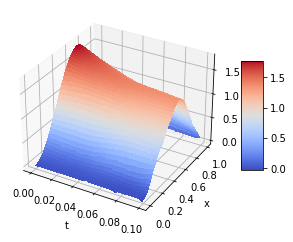

In [426]:
rho_inverse.plot2d()

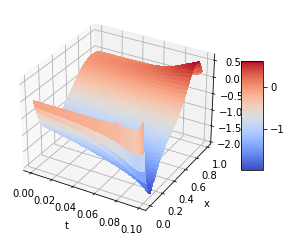

In [417]:
phi_cumulative_inv.plot2d()

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (60, 60) and arg 2 with shape (30, 30).

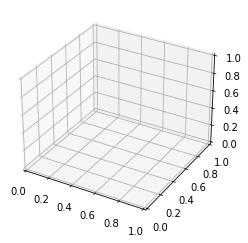

In [429]:
import matplotlib.pyplot as plt
from matplotlib import cm
n=60
func1 = np.zeros((n,n))
func2 = np.zeros((n,n))
x_lims = phi.area_lims[0]
y_lims = phi.area_lims[1]
ax1 = np.linspace(x_lims[0], x_lims[1], n, endpoint=False)
ax2 = np.linspace(y_lims[0], y_lims[1], n, endpoint=False)
X, Y = np.meshgrid(ax1, ax2)

for i in range(n):
    for j in range(n): 
        func1[j, i] = rho.eval([ax1[i], ax2[j]],[0,0]) # np.abs(rho.eval([ax1[i], ax2[j]],[0,0]) - rho_inverse.eval([ax1[i], ax2[j]],[0,0]))
        func2[j,i] = rho_inverse.eval([ax1[i], ax2[j]],[0,0])
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, func, cmap=cm.coolwarm,
                linewidth=0, antialiased=False)

# ax.set_xticks(X)
# ax.set_xticks(Y)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('t')
ax.set_ylabel('x')
plt.show()

([<matplotlib.axis.XTick at 0x2897f5f5d30>,
 [Text(0, 0, '0'),
  Text(15, 0, '0.25'),
  Text(30, 0, '0.5'),
  Text(45, 0, '0.75'),
  Text(60, 0, '1')])

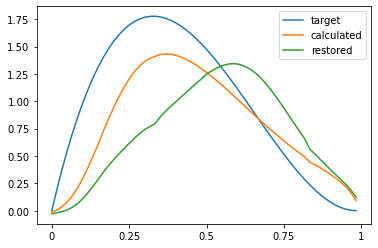

In [432]:
plt.plot(intrested)
plt.plot(func1[:,-1])
plt.plot(func2[:,-1])

plt.legend(['target', 'calculated', 'restored'])
plt.xticks([0, 15, 30, 45, 60], [0, 0.25, 0.5, 0.75, 1])